### Chicken


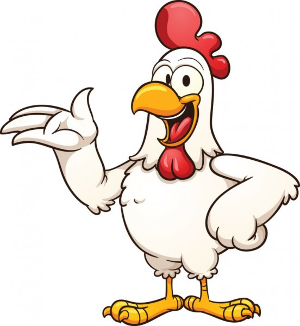

    Bildquelle: Depositphotos.com
    

### Lernziel:

Lernen Sie eine Datei zu laden und den ersten Umgang mit einem DataFrame kennen.


### Hauptziel:

Wie hoch ist der Erlös?

### Daten:

Die Daten habe ich von calmcode.io. Folgende Beschreibung über die Daten ist auf deren Internetseite zu lesen:

<br>

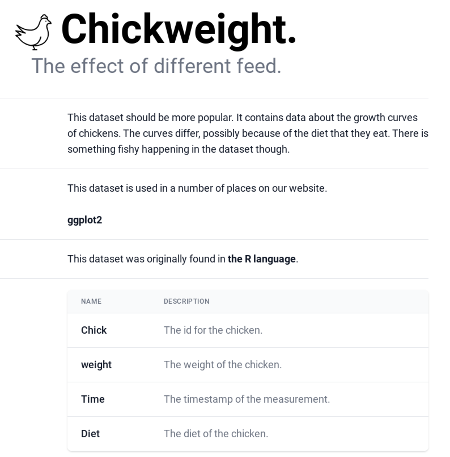
    
    Bildquelle: calmcode.io

#### Importieren der notwendigen Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Laden der csv-Datei

In [2]:
df = pd.read_csv('chickweight.csv')

#### Kennenlernen der Daten

Folgende Fragen sollte Sie mindestens anschließend beantworten können:

* Wieviele Einträge gibt es?
* Wie viele Merkmale sind vorhanden?
* Welchen Datentyp haben die Merkmale?
* Wieviel NaNs existieren?
* Sind Ausreißer im Datensatz enthalten?
* Fertigen Sie mindestens ein Histogramm an?
* (Noch nicht besprochen:) Existieren Correlationen zwischen den Merkmalen?
* Wieviel verschiedene Einträge existieren je Merkmal?
* ...


In [3]:
df.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  578 non-null    int64
 1   Time    578 non-null    int64
 2   Chick   578 non-null    int64
 3   Diet    578 non-null    int64
dtypes: int64(4)
memory usage: 18.2 KB


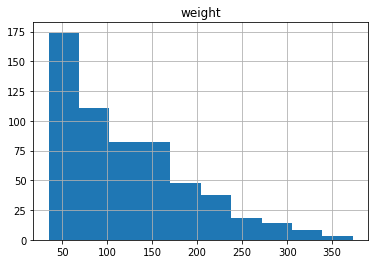

In [5]:
df.hist('weight');

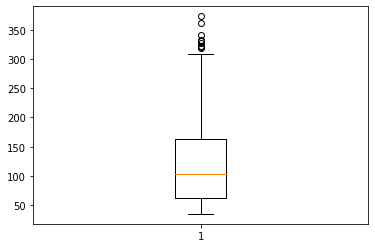

In [6]:
plt.boxplot(df.weight);

In [7]:
df[(df.weight > 300) == True]

,weight,Time,Chick,Diet
83,305,21,7,1
229,307,18,21,2
230,318,20,21,2
231,331,21,21,2
327,309,21,29,2
363,305,21,32,3
386,327,20,34,3
387,341,21,34,3
397,332,18,35,3
398,361,20,35,3


In [8]:
df.Chick.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [9]:
df.Diet.unique()

array([1, 2, 3, 4])

In [10]:
df.Time.unique()

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 21])

In [11]:
df.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


#### Data Cleansing

Folgende Schritte sind hier durchzuführen:
* Entscheidung Umgang und Behandlung von NaNs.
* Entscheidung Umgang und Behandlung von Ausreißer.
* Werden zusätzliche Merkmale benötigt, evtl. aus Operationen von den bekannten Merkmale?
* Sind evtl. Spalten zu löschen?


In [12]:
# Der Datensatz hat zwar Ausreißer über 300, jedoch scheinen diese bisher nicht falsch zu sein.
# Es existieren keine NaNs.
# Bisher werden keine zusätzliche Merkmale benötigt oder kein Merkmal muss gelöscht werden.

Das Gewicht der Hühner geht bis ca. 340. Da hier keine Einheit zu finden ist und ein normales Huhn 2 - 5 kg schwert ist, werden wir das Gewicht mit 10 multiplizieren.

In [13]:
df['weight'] = df['weight'] * 10
df.head()

,weight,Time,Chick,Diet
0,420,0,1,1
1,510,2,1,1
2,590,4,1,1
3,640,6,1,1
4,760,8,1,1


#### EDA

Über die einzelnen Merkmale werden hier statistische Auswertung gemacht. Ergänzt werden diese Statistiken mittels Zusammenhänge miteinander. Zum Teil wird in der EDA einige Prozesse wie unter "Kennenlernen der Daten" durchgeführt, jedoch arbeitet man hier nun mit bereinigten Daten.

Versuchen Sie gern auch viel zu Plotten:
* Histogramme
* Correlationen (mittels Scatterplot)
* Verschiedene Charts

Zudem wenden Sie hier Auswertung mittels groupby() oder pivot() an.


In [14]:
df.columns

Index(['weight', 'Time', 'Chick', 'Diet'], dtype='object')

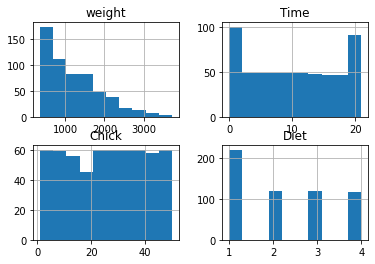

In [15]:
df.hist();

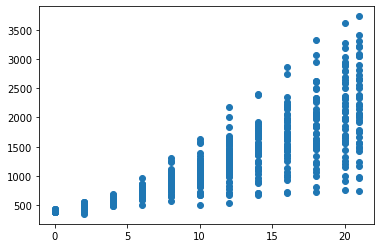

In [16]:
plt.scatter(df.Time, df.weight)

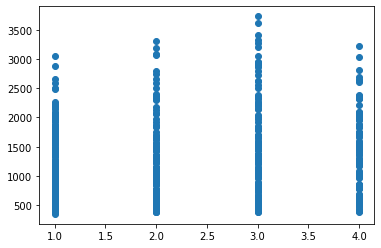

In [17]:
plt.scatter(df.Diet, df.weight)

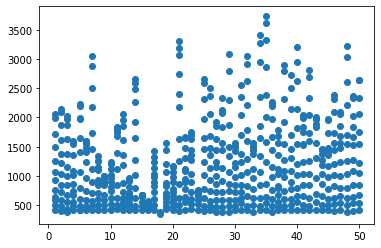

In [18]:
plt.scatter(df.Chick, df.weight)

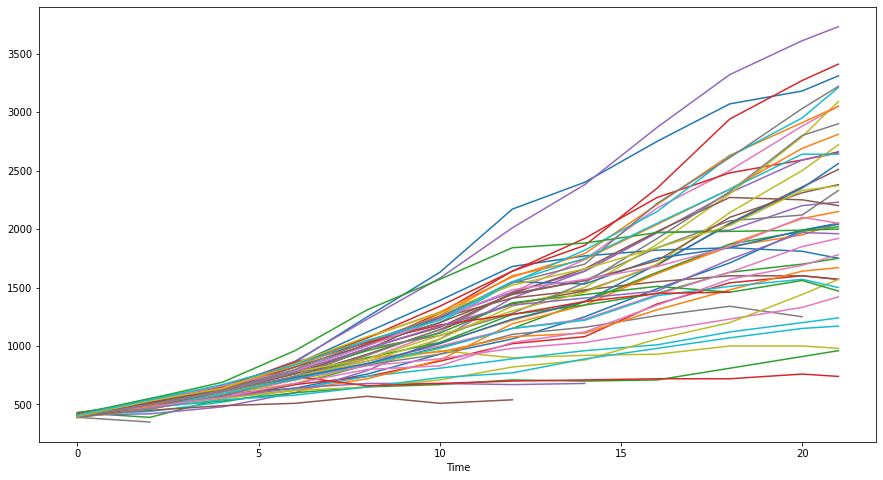

In [19]:
df.pivot_table('weight', 'Chick', 'Time').T.plot(legend = '', figsize = (15, 8));

### Analyse

Wie lange haben die Hühner gelebt? (Wir gehen davon aus, dass die Hühner am 21. Tage verkauft wurden.)

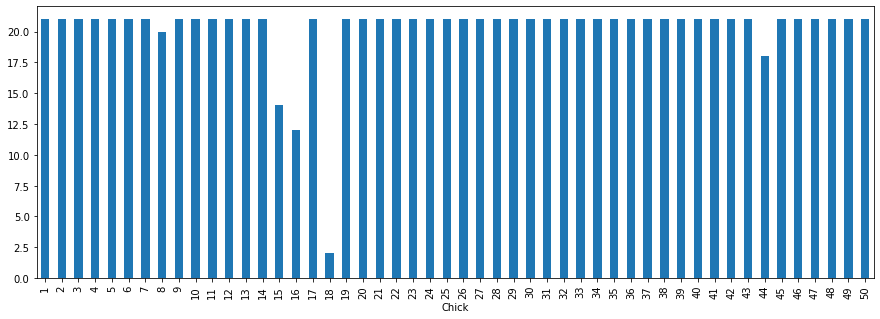

In [20]:
df.groupby('Chick').max()['Time'].plot(kind = 'bar', figsize=(15, 5));

In [21]:
# only chicken with max = 21
df_21 = df[(df.Time == 21) == True]
df_21.sort_values('weight').head()

,weight,Time,Chick,Diet
267,740,21,24,2
154,960,21,13,1
106,980,21,9,1
219,1170,21,20,1
118,1240,21,10,1


Gibt es eine Tendenz im Unterschiedlichen Endgewicht je Diät?

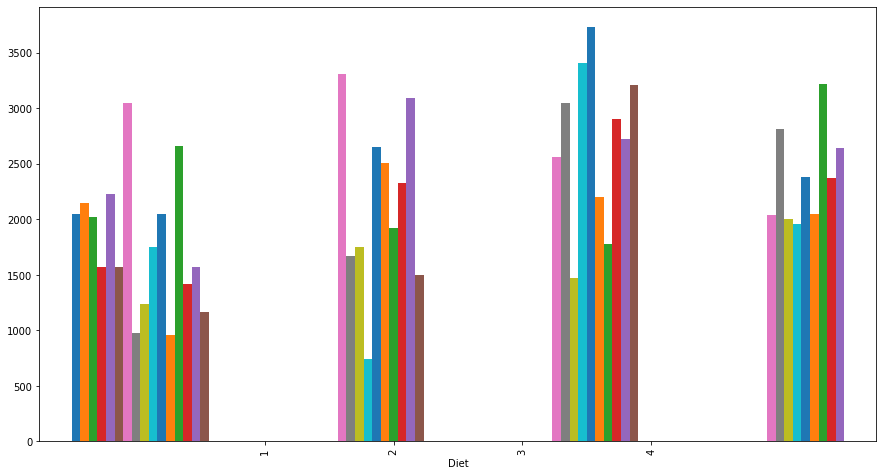

In [22]:
df_21.groupby(['Diet', 'Chick']).max()['weight'].unstack().plot(kind = 'bar', figsize=(15,8), legend = '',
                                                            width = 3);

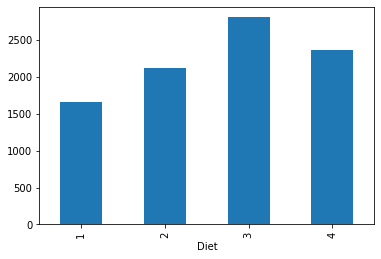

In [23]:
df_21.groupby('Diet').median()['weight'].plot(kind = 'bar');


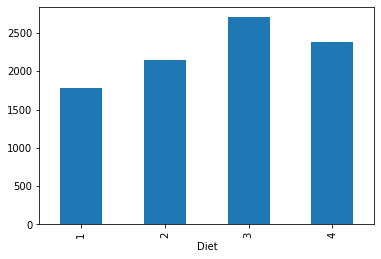

In [24]:
df_21.groupby('Diet').mean()['weight'].plot(kind = 'bar');

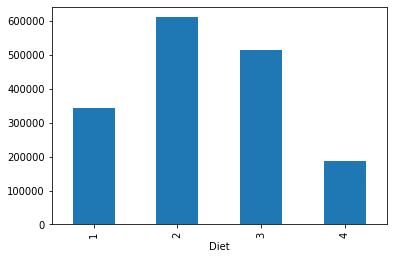

In [25]:
df_21.groupby('Diet').var()['weight'].plot(kind = 'bar');

Wir gehen nun von einem Preis von 9 EUR pro kg aus für Hühner mit einem Gewicht über 1.5 kg. Für die Hühner mit einem geringeren Gewicht kann nur ein Preis von 7 EUR erzielt werden. Ermitteln Sie den Preis pro Huhn:

In [42]:
import warnings
warnings.filterwarnings("ignore")

df_21['price'] = [9*i/1000 if i > 1500 else 7*i/1000 for i in df_21.weight]
df_21.head()

,weight,Time,Chick,Diet,price
11,2050,21,1,1,18.45
23,2150,21,2,1,19.35
35,2020,21,3,1,18.18
47,1570,21,4,1,14.13
59,2230,21,5,1,20.07


Desweiteren wissen wir die Kosten je Diät Tag:

* Diät 1: 0.50
* Diät 2: 0.45
* Diät 3: 0.60
* Diät 4: 0.55

Bestimmen Sie die Kosten und dann den Gewinn pro Huhn. Ermitteln Sie anschließend, welche Diät Sie aufgrund vom Gewinn empfehlen würden.

In [57]:
warnings.filterwarnings("ignore")

df_21['cost'] = [j*0.5 if i == 1 else j*0.45 if i == 2 else j*0.60 if i == 3 else j*0.55 
                 for i, j in zip(df_21.Diet, df_21.Time)]
df_21.head()

,weight,Time,Chick,Diet,price,cost,profit
11,2050,21,1,1,18.45,10.5,7.95
23,2150,21,2,1,19.35,10.5,8.85
35,2020,21,3,1,18.18,10.5,7.68
47,1570,21,4,1,14.13,10.5,3.63
59,2230,21,5,1,20.07,10.5,9.57


In [58]:
df_21['profit'] = df_21.price - df_21.cost
df_21.head()

,weight,Time,Chick,Diet,price,cost,profit
11,2050,21,1,1,18.45,10.5,7.95
23,2150,21,2,1,19.35,10.5,8.85
35,2020,21,3,1,18.18,10.5,7.68
47,1570,21,4,1,14.13,10.5,3.63
59,2230,21,5,1,20.07,10.5,9.57


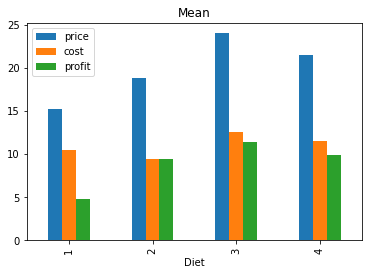

In [59]:
df_21.groupby('Diet').mean()[['price', 'cost', 'profit']].plot(kind = 'bar', title = 'Mean');

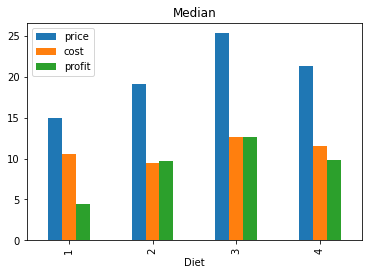

In [60]:
df_21.groupby('Diet').median()[['price', 'cost', 'profit']].plot(kind = 'bar', title = 'Median');

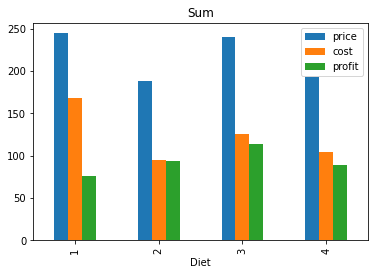

In [61]:
df_21.groupby('Diet').sum()[['price', 'cost', 'profit']].plot(kind = 'bar', title = 'Sum');

### Zusatz

Falls Sie noch Zeit haben, versuchen Sie sich weitere Fragestellungen zu überlegen.

Hier ein paar Anregungen:
 * War der Verkauf am 21. Tag immer der Idealste?
 * Wenn nein, gibt es einen optimaleren Verkaufstag pro Diät?
 * Ändert sich die Wahl, wenn man die Betrachtung über die Tiere, die vor dem Verkaufstag gestorben sind mit in Betracht zieht? (Kosten pro erlebten Tag)
 * ...